In [51]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

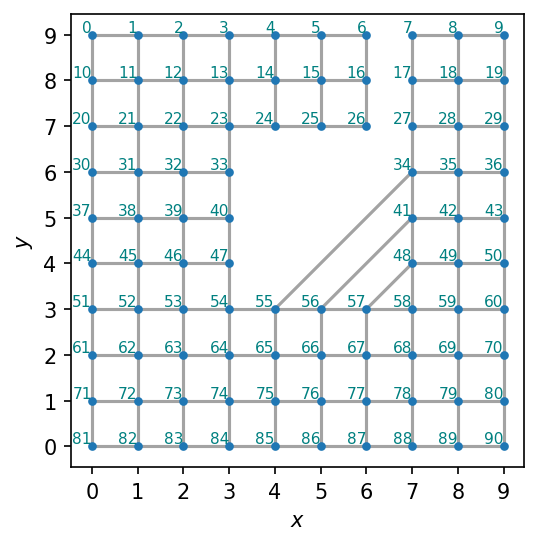

In [57]:
N = 10
lattice = SquareLattice(N, BC="open")
N_hole = 2
middle_sites = [(N-N_hole)//2 * N + (N-N_hole)//2 + i*N + j for i in range(-1, N_hole) for j in range(N_hole+1)]
lattice.remove_sites(middle_sites)

lattice.remove_bonds([(6, 7), (16, 17), (26, 27)])

lattice.glue_bond([57, 56, 55], [48, 41, 34], (0, 2), codim=1)
# lattice.glue_bond([47, 40, 33], [27, 17, 7], (1, 3), codim=1)
# lattice.glue_bond([24, 25, 26], [7, 8, 9], (2, 0), codim=1)

# lattice.move_sites([i*N +j for i in range(N//3) for j in range(2*N//3 + 1)], (0.0, +3.0))
# lattice.move_sites([7, 8, 9, 17, 18, 19, 27, 28, 29], (-3.0, -0.5))
# lattice.move_sites([34, 35, 36, 41, 42, 43], (-1.5, -0.25))

num_sites = lattice.get_num_sites()
lattice_sites = lattice.get_sites()

lattice.plot(True)

[]
Lowest found energy:  0.08843952751121519
Index of lowest absolute energy:  181


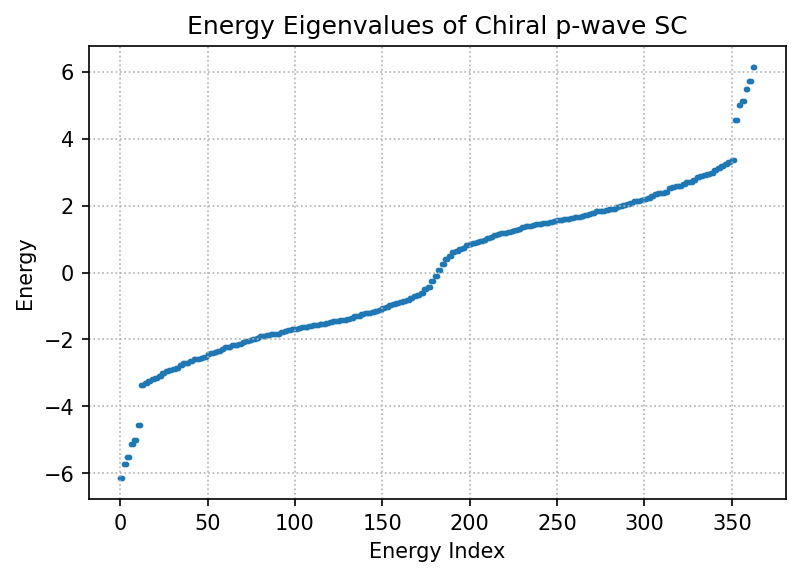

In [53]:
mu = 1.0
delta = complex(1.0, 0.0)
t = 1

n = 1
hop_phase_triangle = np.exp(n*np.pi/2)
hop_phase_pentagon = hop_phase_triangle.conjugate()
flagged_bonds_triangle = [(48, 57), (41, 56), (34, 55)]
# flagged_bonds_pentagon = [(57, 48), (56, 41), (55, 34)]

# flagged_bonds_pentagon = [(34, 27), (35, 28), (36, 29)]
# flagged_bonds_pentagon = [(27, 47), (17, 40), (7, 33), (24, 23), (14, 13), (4, 3)]

# flagged_bonds_pentagon = [(27, 47), (17, 40), (7, 33), (24, 23), (14, 13), (4, 3), (57, 48), (56, 41), (55, 34)]

Ham_constructor = HamiltonianConstructor(mu-4*t, t, t, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
block_indices = Ham_constructor.get_block_indices(lattice.get_num_sites())

for flagged_bond in flagged_bonds_triangle:
    Ham_constructor.add_phase(H_direct_lattice, flagged_bond, hop_phase_triangle, num_sites)

for flagged_bond in flagged_bonds_pentagon:
    Ham_constructor.add_phase(H_direct_lattice, flagged_bond, hop_phase_pentagon, num_sites)

energies, states = scipy.linalg.eigh(H_direct_lattice)

tol = 0.05
low_energy_indices = np.argwhere(np.abs(energies) < tol)[:, 0]
print(low_energy_indices)

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)

Index = 181


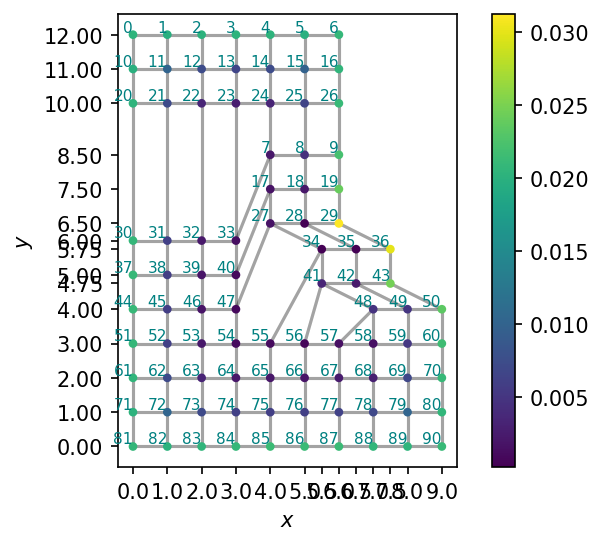

In [54]:
# gs_idx = 4 * num_sites - 1
for gs_idx in range(gs_idx, gs_idx + 1):
    print("Index =", gs_idx)
    gs_wave_function = states[:, gs_idx]
    gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
    gs_probabilities = np.zeros(shape=(num_sites, 1))

    for site_idx in range(num_sites):
        gs_probabilities[site_idx] = np.sum(
            gs_probabilities_nambu[block_indices[site_idx]]
        )

    x_values = [k[0] for k in lattice_sites]
    y_values = [k[1] for k in lattice_sites]

    color_map = plt.get_cmap("viridis")
    sc = lattice.plot(True, c=(gs_probabilities), cmap=color_map)
    plt.colorbar(sc)
    plt.show()

In [55]:
print(lattice.get_local_bond_index(26, 9))
print(lattice.get_local_bond_index(57, 48))

2
0
